In [1]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import csv
from keras.utils.vis_utils import plot_model
from keras.callbacks import History
from matplotlib import pyplot as plt


i = 112

dense_layers = [2]
filter_size = [32, 32, 64, 64, 128, 128, 256]
conv_layers = [6]

train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

training = train_data.flow_from_directory('train',target_size=(i,i), batch_size=32,class_mode='categorical')
test = test_data.flow_from_directory('test',target_size=(i,i), batch_size=32,class_mode='categorical')

NAME = "Bangla_Digit_Final-{}-conv-{}-dense-{}".format(conv_layers[0],dense_layers[0],int(time.time()))
print(NAME)
model = Sequential()
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME), histogram_freq=0, write_images=True, write_graph=True, update_freq='epoch')

model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics= ["accuracy"])

history = History()
model.fit_generator(training, epochs=100, validation_data=test, callbacks=[tensorboard,history])

print(history.history.keys())
plot_model(model, to_file='DigitFinal.png')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



testp = test_data.flow_from_directory('test',target_size=(i,i), batch_size=32,class_mode='categorical',shuffle=False)        
t_pred = model.predict_generator(testp)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']

f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)



plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()




E:\Users\Arnab\Anaconda3\Lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 4000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Bangla_Digit_Final-6-conv-2-dense-1555405047
Epoch 1/100
125/125 [==============================] - 11s 89ms/step - loss: 1.2236 - acc: 0.5653 - val_loss: 0.8828 - val_acc: 0.8885
Epoch 2/100
125/125 [==============================] - 9s 72ms/step - loss: 0.2341 - acc: 0.9167 - val_loss: 0.6413 - val_acc: 0.9475
Epoch 3/100
125/125 [==============================] - 9s 72ms/step - loss: 0.1564 - acc: 0.9502 - val_loss: 0.4207 - val_acc: 0.9470
Epoch 4/100
125/125 [==============================] - 9s 73ms/step - loss: 0.1022 - acc: 0.9680 - val_loss: 0.3022 - val_acc: 0.9580
Epoch 5/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0752 - acc: 0.9748 - val_loss: 0.3130 - val_acc: 0.9640
Epoch 6/100
125/125 [==============================] - 9s 73ms/step - loss: 0.0636 - acc: 0.9778 - val_loss: 0.2440 - val_acc: 0.9705
Epoch 7/100
125/125 [==============================] - 9s 72ms/s

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Found 2000 images belonging to 10 classes.
[0 0 0 ... 9 9 9]
Confusion Matrix
[[197   0   0   1   1   1   0   0   0   0]
 [  0 199   0   0   1   0   0   0   0   0]
 [  0   1 199   0   0   0   0   0   0   0]
 [  0   0   0 196   0   4   0   0   0   0]
 [  0   0   0   0 200   0   0   0   0   0]
 [  2   0   0   0   0 197   1   0   0   0]
 [  0   0   0   1   0   4 195   0   0   0]
 [  0   0   2   0   0   1   0 197   0   0]
 [  1   0   0   0   2   0   0   0 197   0]
 [  0   8   0   0   0   0   0   1   0 191]]
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       200
          1       0.96      0.99      0.98       200
          2       0.99      0.99      0.99       200
          3       0.99      0.98      0.98       200
          4       0.98      1.00      0.99       200
          5       0.95      0.98      0.97       200
          6       0.99      0.97      0.98       200
          7       0.99      0.98      0.99  

<Figure size 640x480 with 2 Axes>

In [4]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import csv
from keras.utils.vis_utils import plot_model
from keras.callbacks import History
from matplotlib import pyplot as plt

from keras.models import Model
from keras.models import load_model
model = load_model('digit.h5')
i = 112
test_data = ImageDataGenerator(rescale=1./255)
test = test_data.flow_from_directory('test',target_size=(i,i), batch_size=32,class_mode='categorical',shuffle=False)

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
#activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
testp = test_data.flow_from_directory('test',target_size=(i,i), batch_size=32,class_mode='categorical')        
activations = activation_model.predict_generator(testp) 


Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


MemoryError: 

In [3]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    #fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*1.5,col_size*1.5))
    fig, ax = plt.subplots(row_size, col_size)
    plt.savefig('weights.png')
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1    

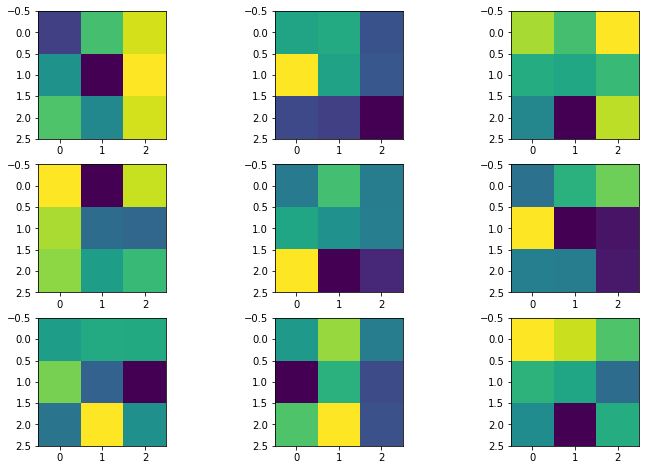

In [4]:
weight_conv2d_1 = model.layers[5].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 3
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index])
    filter_index += 1

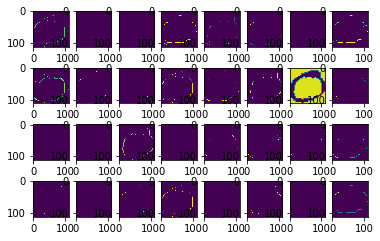

In [5]:
display_activation(activations, 8, 4, 0)

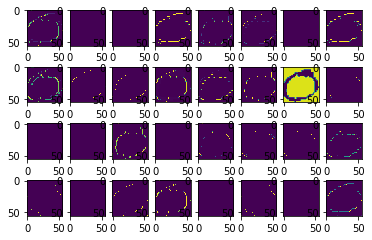

In [6]:
display_activation(activations, 8, 4, 1)

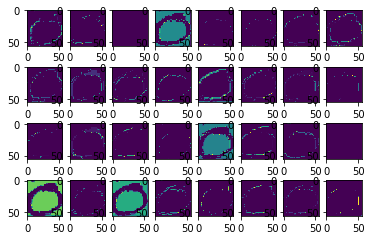

In [7]:
display_activation(activations, 8, 4, 2)

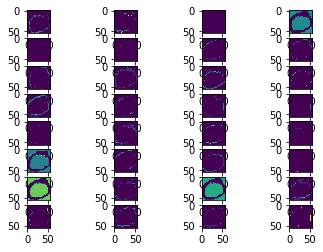

In [8]:
display_activation(activations, 4, 8, 3)
plt.savefig('weights.png')

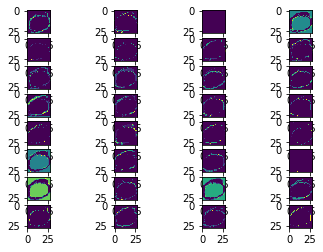

In [9]:
display_activation(activations, 4, 8, 4)

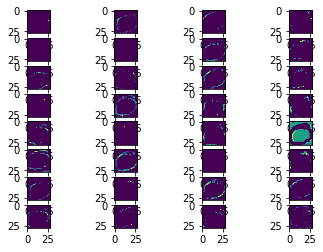

In [10]:
display_activation(activations, 4, 8, 5)

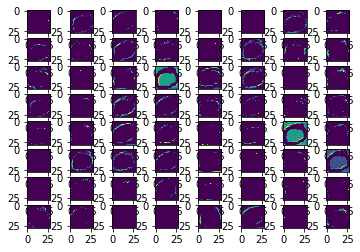

In [11]:
display_activation(activations, 8, 8, 6)

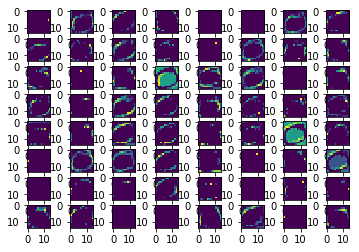

In [12]:
display_activation(activations, 8, 8, 7)

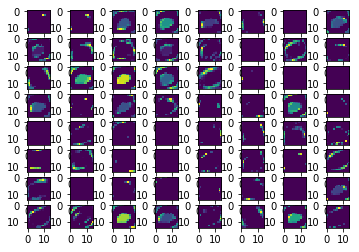

In [13]:
display_activation(activations, 8, 8, 8)

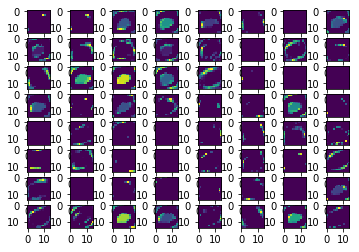

In [14]:
display_activation(activations, 8, 8, 9)

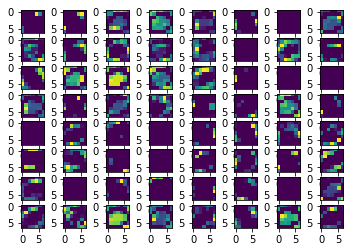

In [15]:
display_activation(activations, 8, 8, 10)

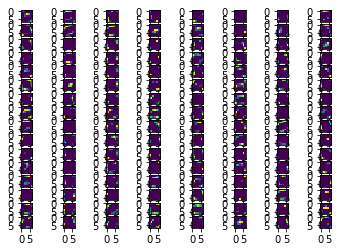

In [16]:
display_activation(activations, 8, 16, 11)

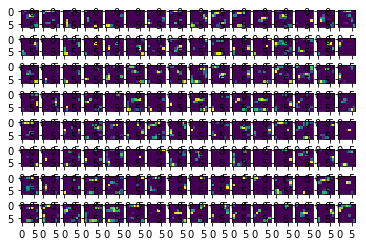

In [17]:
display_activation(activations, 16, 8, 12)

IndexError: too many indices for array

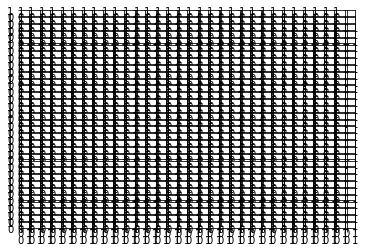

In [18]:
display_activation(activations, 32,32, 17)

In [ ]:
display_activation(activations, 32, 32, 17)

In [27]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    #fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*1.5,col_size*1.5))
    fig, ax = plt.subplots(row_size, col_size)
    plt.savefig(str(act_index)+'weights.png')
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1 

In [ ]:
display_activation(activations, 4, 4, 0)

In [ ]:
display_activation(activations, 4, 4, 1)

In [ ]:
display_activation(activations, 4, 4, 2)

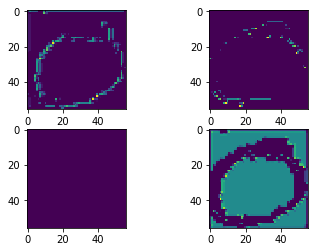

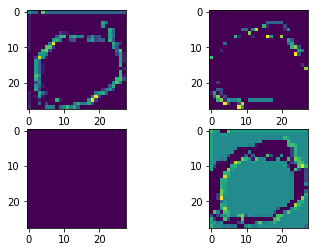

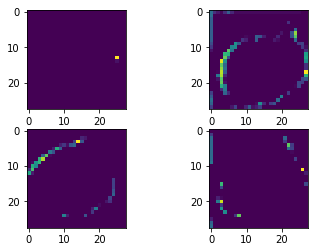

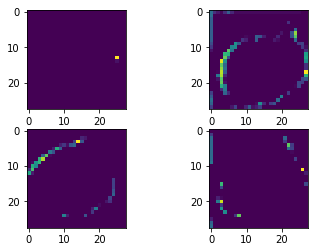

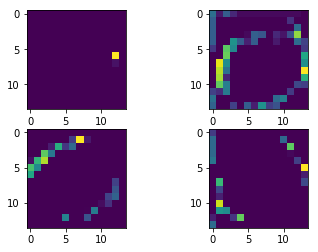

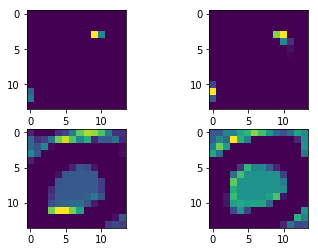

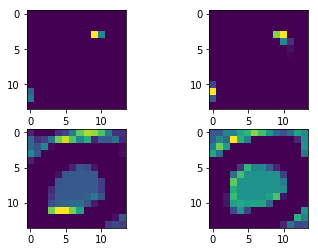

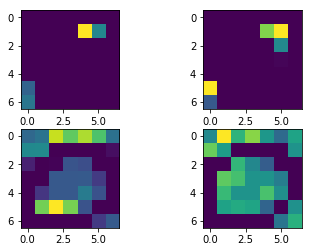

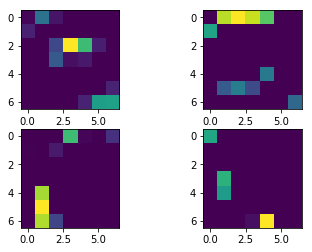

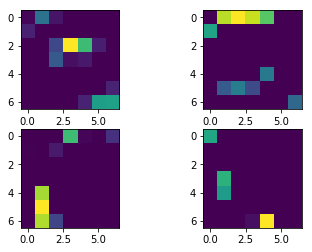

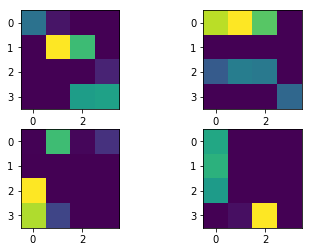

In [29]:
display_activation(activations, 2, 2, 3)
plt.savefig('1weights.png')
display_activation(activations, 2, 2, 4)
plt.savefig('2weights.png')
display_activation(activations, 2, 2, 5)
display_activation(activations, 2, 2, 6)
plt.savefig('3weights.png')
display_activation(activations, 2, 2, 7)
plt.savefig('4weights.png')
display_activation(activations, 2, 2, 8)
plt.savefig('5weights.png')
display_activation(activations, 2, 2, 9)
plt.savefig('6weights.png')
display_activation(activations, 2, 2, 10)
plt.savefig('7weights.png')
display_activation(activations, 2, 2, 11)
plt.savefig('8weights.png')
display_activation(activations, 2, 2, 12)
plt.savefig('9weights.png')
display_activation(activations, 2, 2, 13)
plt.savefig('10weights.png')

In [ ]:
display_activation(activations, 4, 4, 14)
display_activation(activations, 4, 4, 15)

In [ ]:
display_activation(activations, 4, 4, 1)
display_activation(activations, 4, 4, 2)

In [ ]:
display_activation(activations, 2, 2, 3)
#plt.savefig('1weights.png')
display_activation(activations, 2, 2, 4)
#plt.savefig('2weights.png')
display_activation(activations, 2, 2, 5)
#plt.savefig('3_3weights.png')
display_activation(activations, 2, 2, 6)
#plt.savefig('3weights.png')
display_activation(activations, 2, 2, 7)
#plt.savefig('4weights.png')
display_activation(activations, 2, 2, 8)
#plt.savefig('5weights.png')
display_activation(activations, 2, 2, 9)
#plt.savefig('6weights.png')
display_activation(activations, 2, 2, 10)
#plt.savefig('7weights.png')
display_activation(activations, 2, 2, 11)
#plt.savefig('8weights.png')
display_activation(activations, 2, 2, 12)
#plt.savefig('9weights.png')
display_activation(activations, 2, 2, 13)
#plt.savefig('10weights.png')